In [15]:
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

import os.path
import pickle
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import matplotlib        as mpl
import seaborn           as sns
%matplotlib inline

# Random numbers
import random
np.random.seed(9)
#from scipy.stats import randint as sp_randint

# Gaussian process
import george
from george.kernels import ExpSquaredKernel

# Plot settings
mpl.rcParams['legend.frameon' ] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize' ] = 18
mpl.rcParams['axes.labelsize' ] = 18
mpl.rcParams['lines.linewidth'] = 2.5

In [18]:
# Define underlying truth function (obviously unknown)
score_func = lambda x: -x*np.sin(x)
x = np.arange(0, 10, 0.1)

In [31]:
# Generate some fake, noisy data based on the truth function
xp = 10 * np.sort(np.random.rand(5))
yerr = 0.2 * np.ones_like(xp)
yp = score_func(xp) + yerr * np.random.randn(len(xp))

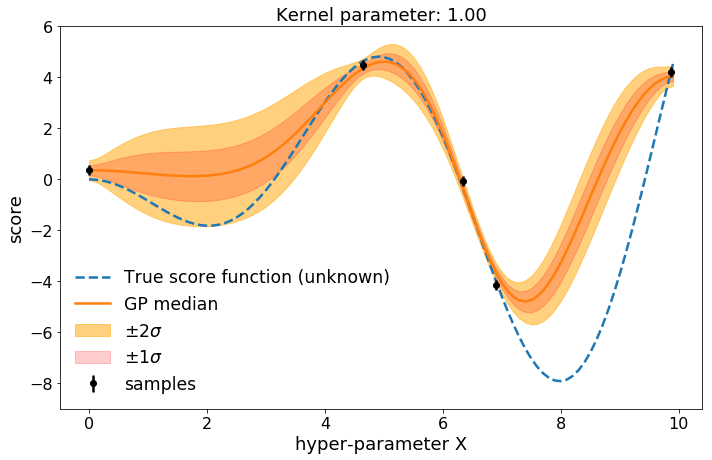

In [32]:
# Setup and plot a gaussian process
def plot_gauss_process(_xp,_yp,_yerr,_l=1.0):
    
    kernel = ExpSquaredKernel(_l)
    gp = george.GP(kernel)
    gp.compute(_xp, _yerr)

    mu, cov = gp.predict(_yp, x)
    std = np.sqrt(np.diag(cov))
    
    plt.figure(figsize=(10,6.5))
    plt.plot(x, score_func(x), '--', label='True score function (unknown)')
    plt.plot(x, mu, label='GP median')
    plt.fill_between(x, mu-2*std, mu+2*std, alpha=0.5, color='orange', label='$\pm 2\sigma$')
    plt.fill_between(x, mu-std, mu+std, alpha=0.2, color='r', label='$\pm 1\sigma$')
    plt.errorbar(_xp, _yp, yerr=_yerr, fmt='ok', zorder=3, label='samples')
    plt.ylim(-9,6)
    plt.title('Kernel parameter: {:.2f}'.format(_l))
    plt.ylabel('score')
    plt.xlabel('hyper-parameter X')
    plt.legend(loc='best')
    plt.tight_layout()
    return

plot_gauss_process(xp,yp,yerr)

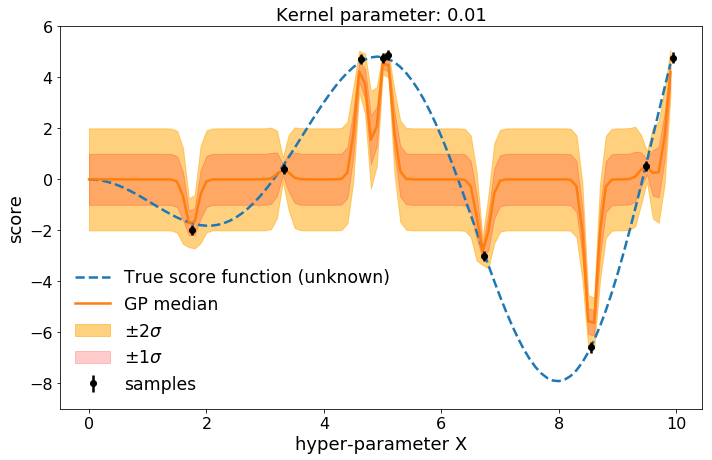

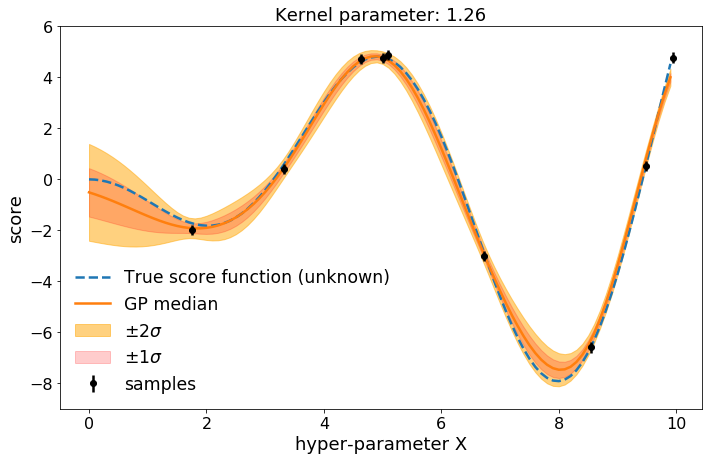

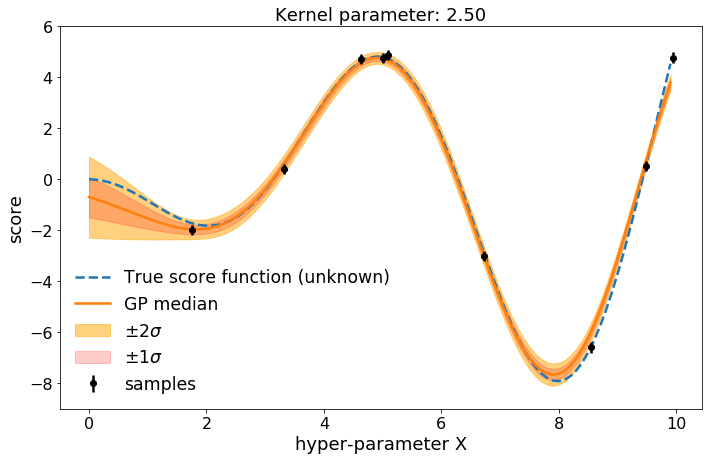

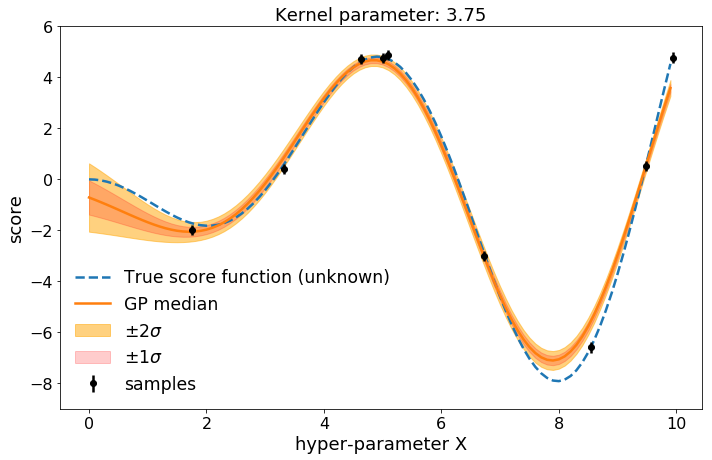

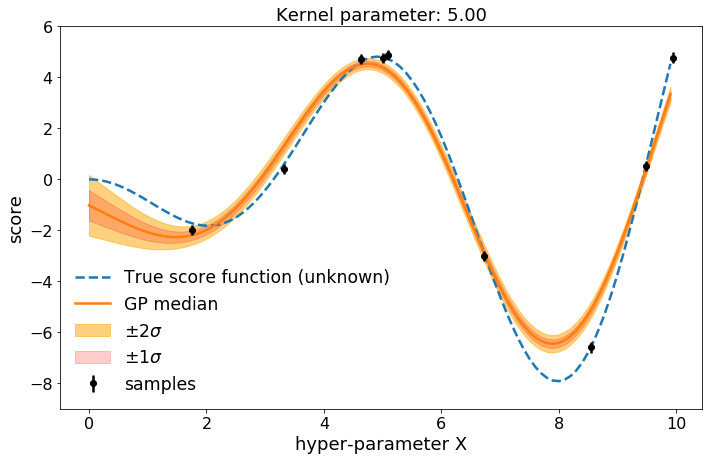

In [36]:
# For 10 points, check how the interpolation works depending on the kernel parameter
xp2   = 10 * np.sort(np.random.rand(i))
yerr2 = 0.2 * np.ones_like(xp2)
yp2   = score_func(xp2) + yerr2 * np.random.randn(len(xp2))
for j in np.linspace(0.01,5,5):
    plot_gauss_process(xp2,yp2,yerr2,j)